## TO DO 
ideas, pytania i rzeczy ktore jeszcze planuje zrobic

- figure out how the dateofbirth/date works
- countploty - male, titles, cultures, house
- density plot? - popularity
- check if popular characters don’t have NaNs
- czy podawac id, i imie+nazwisko postaci? skoro kazde unikatowe to to dla modelu zadna informacja
- do correlation matrix
- plot 
    - isAlive x culture
    - isAlive x house
    - cos jeszcze pewnie
- dodac walidatorow na githuba
- liczby na correlation matrix - spytac Tomaszewskiej bo robia sie tylko w pierwszym wierszu for some reason


In [16]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
np.random.seed(23)
pd.set_option('display.max_columns', None)

# 1. Splitting the Dataset

- Division into sets:
    - For modelers (70%) - X_modelling
    - For validators (30%) - X_validating

- Splitting the modeler's dataset into:
    - Training set (70%) - X_train
    - Validation set (20%) - X_val
    - Test set (10%) - X_test

    ?? czy my mamy dzielic na testowy i walidacyjny u siebie?

In [17]:
df = pd.read_csv('../Data/character-predictions.csv')
X = df
X_modeling, X_validating = train_test_split(
    X, test_size=0.3, random_state=42
)

print(X_modeling.shape)
print(X_validating.shape)

(1362, 33)
(584, 33)



Splitting the dataset for modelers into training, validation, and test sets

In [18]:
X_train, X_val = train_test_split(
    X_modeling, test_size=0.3, random_state=42
)
X_val, X_test = train_test_split(
    X_val, test_size=0.3, random_state=42
)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(953, 33)
(286, 33)
(123, 33)


## About dataset:
This dataset consists of 1362 records and 32 columns describing .

**Columns descriptions:**
- **S.No** - id???? (unique for every character)
- **actual** - is the character alive
- **pred** - predictions whether the character will survive or not
- **alive** - probability that the character will survive
- **plod** - probability that the character will die
- **name** - character name
- **title** - character title
- **male** - is the character male
- **culture** - character culture
- **dateOfBirth** - date of birth
- **dateOfDeath** - date of death
- **mother** - character's mother's name
- **father** - character's father's name
- **heir** - name of character heir
- **spouse** - name of character spouse
- **bookX** - does the character appears in book X
- **isAliveX** - is the relative X alive 
- **isNoble** - is the character noble
- **age** - age of the character
- **numDeadRelations** - ???
- **boolDeadRelations** - ???
- **isPopular** - is the character popular with readers ???
- **popularity** - how popular the character is
- **isAlive** - is the character alive


In our opinion columns:
- actual
- pred
- alive
- plod

are usless, because they were provided by the authors for a classification project, and can be removed from the dataset.

S.No also seems to be useless.

In [19]:
df_m = X_modeling
df_v = X_validating

df_m.drop(columns=['S.No', 'actual', 'pred', 'alive', 'plod'], inplace=True)
df_v.drop(columns=['S.No', 'actual', 'pred', 'alive', 'plod'], inplace=True)

Saving separate CSV files for modelers and validators

In [20]:
df_m.to_csv('../Data/Modeling/character-predictions-modeling.csv', index=False)

df_v.to_csv('../Data/Validating/character-predictions-validating.csv', index=False)

In [21]:
df = pd.read_csv('../Data/Modeling/character-predictions-modeling.csv')
df.rename(columns={'DateoFdeath': 'dateOfDeath'}, inplace=True)
df.head(10) 

,name,title,male,culture,dateOfBirth,dateOfDeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,Meha,NaN,0,Free Folk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.006689,1
1,Domeric Bolton,NaN,1,Northmen,279.0,297.0,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,18.0,0,0,0,0.090301,0
2,Maron Greyjoy,NaN,1,Ironborn,275.0,289.0,NaN,NaN,NaN,House Greyjoy,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,14.0,4,1,0,0.140468,0
3,Walder Brax,NaN,0,NaN,293.0,NaN,NaN,NaN,NaN,House Brax,NaN,0,1,1,1,0,NaN,NaN,NaN,NaN,0,0,12.0,0,0,0,0.117057,1
4,Robert Flowers,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,Kingsguard,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.060201,1
5,Elder Brother,Ser,1,NaN,255.0,NaN,NaN,NaN,NaN,Faith of the Seven,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,50.0,0,0,0,0.076923,1
6,Maslyn,NaN,0,NaN,NaN,299.0,NaN,NaN,NaN,Night's Watch,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.013378,0
7,Guyard Morrigen,Ser,1,NaN,278.0,299.0,NaN,NaN,NaN,House Morrigen,NaN,0,1,0,0,1,NaN,NaN,NaN,NaN,0,1,21.0,0,0,0,0.063545,0
8,Osmund Frey,NaN,0,NaN,297.0,NaN,NaN,NaN,NaN,House Frey,NaN,0,1,1,1,0,NaN,NaN,NaN,NaN,0,0,8.0,0,0,0,0.050167,1
9,Emrick,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,Night's Watch,NaN,0,0,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.043478,1


# 3. Checking Basic Information about the Dataset

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1362 non-null   object 
 1   title              659 non-null    object 
 2   male               1362 non-null   int64  
 3   culture            466 non-null    object 
 4   dateOfBirth        315 non-null    float64
 5   dateOfDeath        307 non-null    float64
 6   mother             15 non-null     object 
 7   father             19 non-null     object 
 8   heir               16 non-null     object 
 9   house              1063 non-null   object 
 10  spouse             191 non-null    object 
 11  book1              1362 non-null   int64  
 12  book2              1362 non-null   int64  
 13  book3              1362 non-null   int64  
 14  book4              1362 non-null   int64  
 15  book5              1362 non-null   int64  
 16  isAliveMother      15 no

Number of columns with NaN value is huge for columns:
- mother
- father
- heir
- isAliveMother
- isAliveFather
- isAliveHeir

A bit better dor columns spouse, isAliveSpouse, but still quite a lot of NaNs.

In [23]:
print(df.nunique())

name                 1362
title                 205
male                    2
culture                54
dateOfBirth           113
dateOfDeath            54
mother                 12
father                 16
heir                   15
house                 283
spouse                181
book1                   2
book2                   2
book3                   2
book4                   2
book5                   2
isAliveMother           2
isAliveFather           2
isAliveHeir             2
isAliveSpouse           2
isMarried               2
isNoble                 2
age                    79
numDeadRelations       14
boolDeadRelations       2
isPopular               2
popularity            150
isAlive                 2
dtype: int64


In [24]:
df.describe()

,male,dateOfBirth,dateOfDeath,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1362.000000,315.000000,307.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,15.000000,19.000000,16.000,191.000000,1362.000000,1362.000000,315.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,0.627019,249.206349,2206.798046,0.201909,0.383260,0.492658,0.592511,0.390602,0.800000,0.263158,0.625,0.759162,0.140235,0.469163,35.923810,0.330396,0.080764,0.061674,0.092980,0.747430
std,0.483775,58.938638,24016.081744,0.401572,0.486359,0.500130,0.491548,0.488065,0.414039,0.452414,0.500,0.428716,0.347358,0.499231,25.594596,1.445386,0.272572,0.240651,0.165213,0.434646
min,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,244.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,1.000000,270.000000,299.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000,1.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.036789,1.000000
75%,1.000000,285.000000,299.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000,1.000000,0.000000,1.000000,48.000000,0.000000,0.000000,0.000000,0.090301,1.000000
max,1.000000,300.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


# 4. Analysis of values and dependencies in the dataset

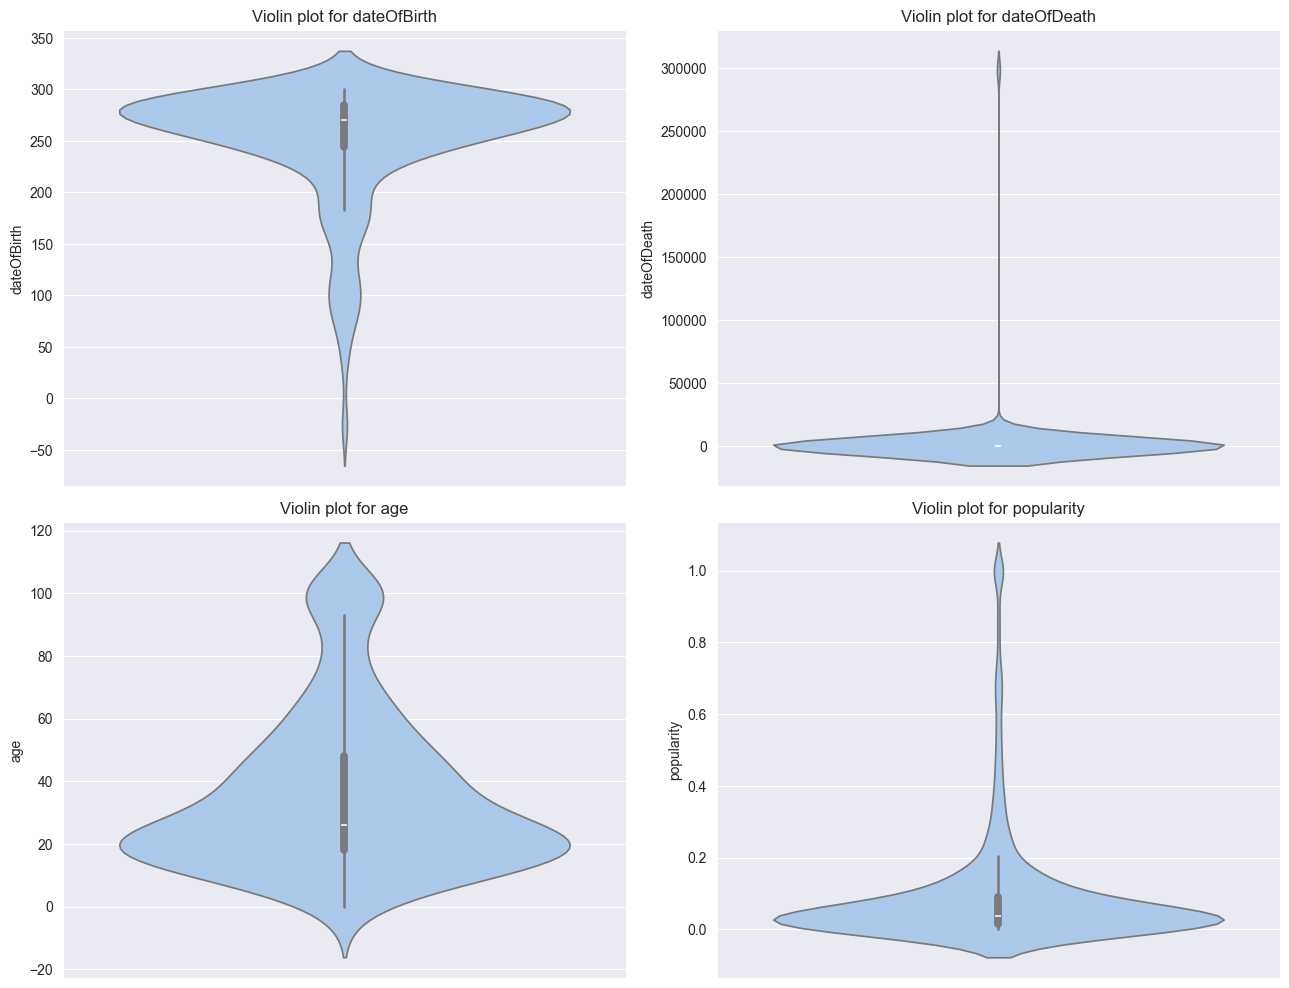

In [25]:
columns_violin = ['dateOfBirth', 'dateOfDeath', 'age', 'popularity']

sns.set_palette("pastel")

fig, axes = plt.subplots(2, 2, figsize=(13, 10))

for i in range(2):
    for j in range(2):
        col_index = i * 2 + j
        if col_index < len(columns_violin):
            # Tworzenie wykresu skrzypcowego dla danej kolumny
            sns.violinplot(y=df[columns_violin[col_index]], ax=axes[i, j])
            axes[i, j].set_ylabel(columns_violin[col_index])
            axes[i, j].set_title(f'Violin plot for {columns_violin[col_index]}')
        else:
            # Ukrycie pustych subwykresów, jeśli nie ma już kolumn do wyświetlenia
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()


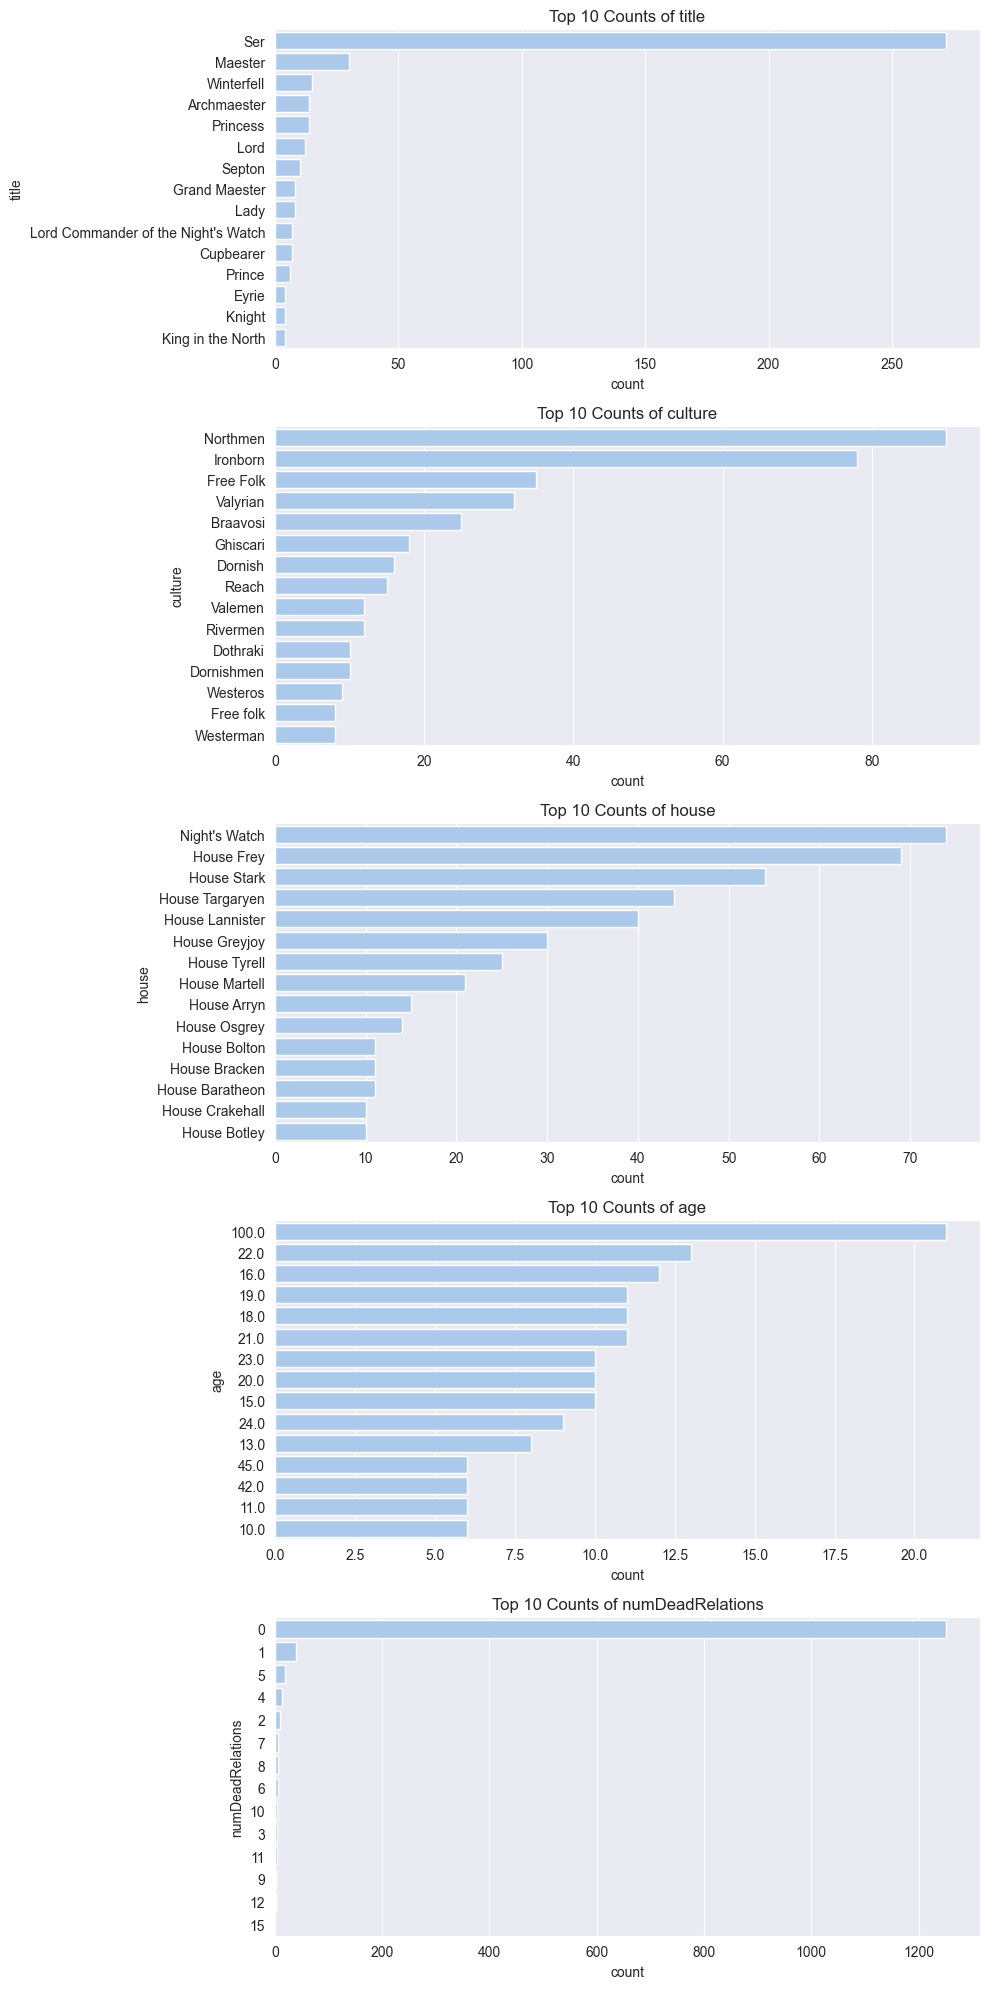

In [26]:
columns_countplot = ['title', 'culture', 'house', 'age', 'numDeadRelations']

fig, axes = plt.subplots(5, 1, figsize=(10, 20))

for i, col in enumerate(columns_countplot):
    # Liczymy wystąpienia unikalnych wartości w kolumnie i wybieramy 10 najczęstszych
    top_values = df[col].value_counts().head(15)

    # Tworzymy wykres typu countplot dla top 10 wartości
    sns.countplot(y=df[col], order=top_values.index, ax=axes[i])
    
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Top 10 Counts of {col}')

plt.tight_layout()
plt.show()

### Let's look at the correlation matrix

In [27]:
corr = df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm', fmt=".2f", annot_kws={"size": 7})
plt.show()

ValueError: could not convert string to float: 'Meha'

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'dateOfBirth'}>,
        <Axes: title={'center': 'dateOfDeath'}>,
        <Axes: title={'center': 'book1'}>],
       [<Axes: title={'center': 'book2'}>,
        <Axes: title={'center': 'book3'}>,
        <Axes: title={'center': 'book4'}>,
        <Axes: title={'center': 'book5'}>],
       [<Axes: title={'center': 'isAliveMother'}>,
        <Axes: title={'center': 'isAliveFather'}>,
        <Axes: title={'center': 'isAliveHeir'}>,
        <Axes: title={'center': 'isAliveSpouse'}>],
       [<Axes: title={'center': 'isMarried'}>,
        <Axes: title={'center': 'isNoble'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'numDeadRelations'}>],
       [<Axes: title={'center': 'boolDeadRelations'}>,
        <Axes: title={'center': 'isPopular'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'isAlive'}>]], dtype=object)

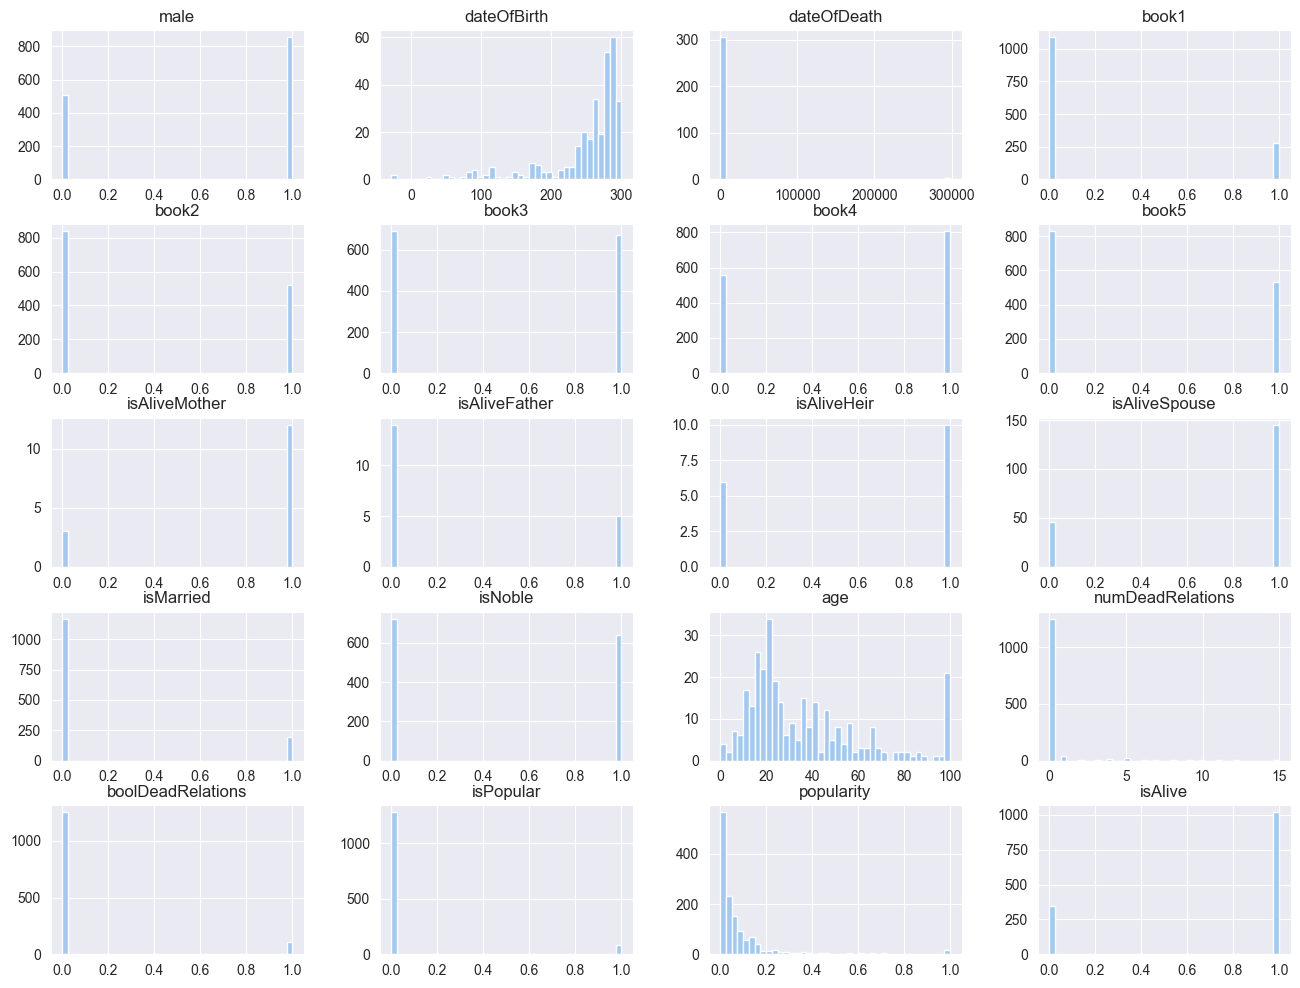

In [30]:
df.hist(bins=40, figsize=(16,12))

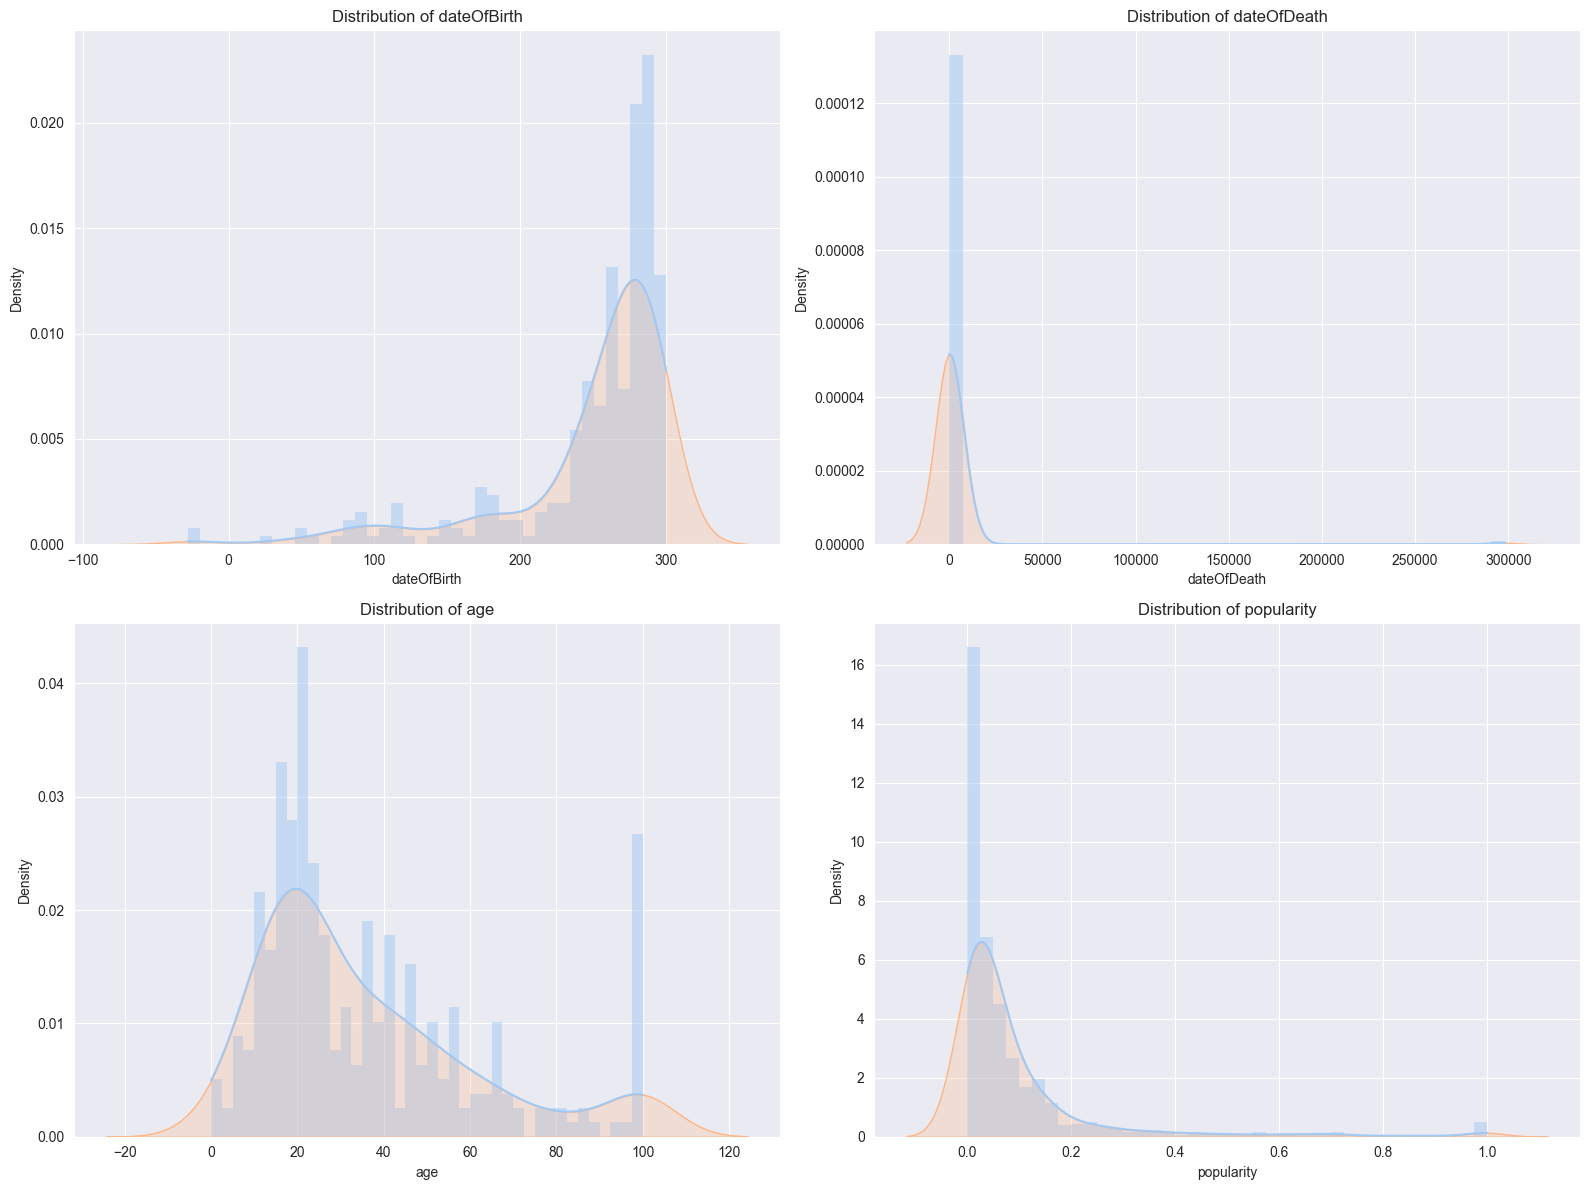

In [37]:
numerical_df = df[["dateOfBirth","dateOfDeath","age","popularity"]]
numerical_cols = numerical_df.select_dtypes(include=[np.number]).columns.tolist()

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, stat='density', ax=axs[i], bins=40, linewidth=0)
    sns.kdeplot(df[col], fill=True, ax=axs[i])

    axs[i].set_title(f"Distribution of {col}")

fig.tight_layout()
plt.show()

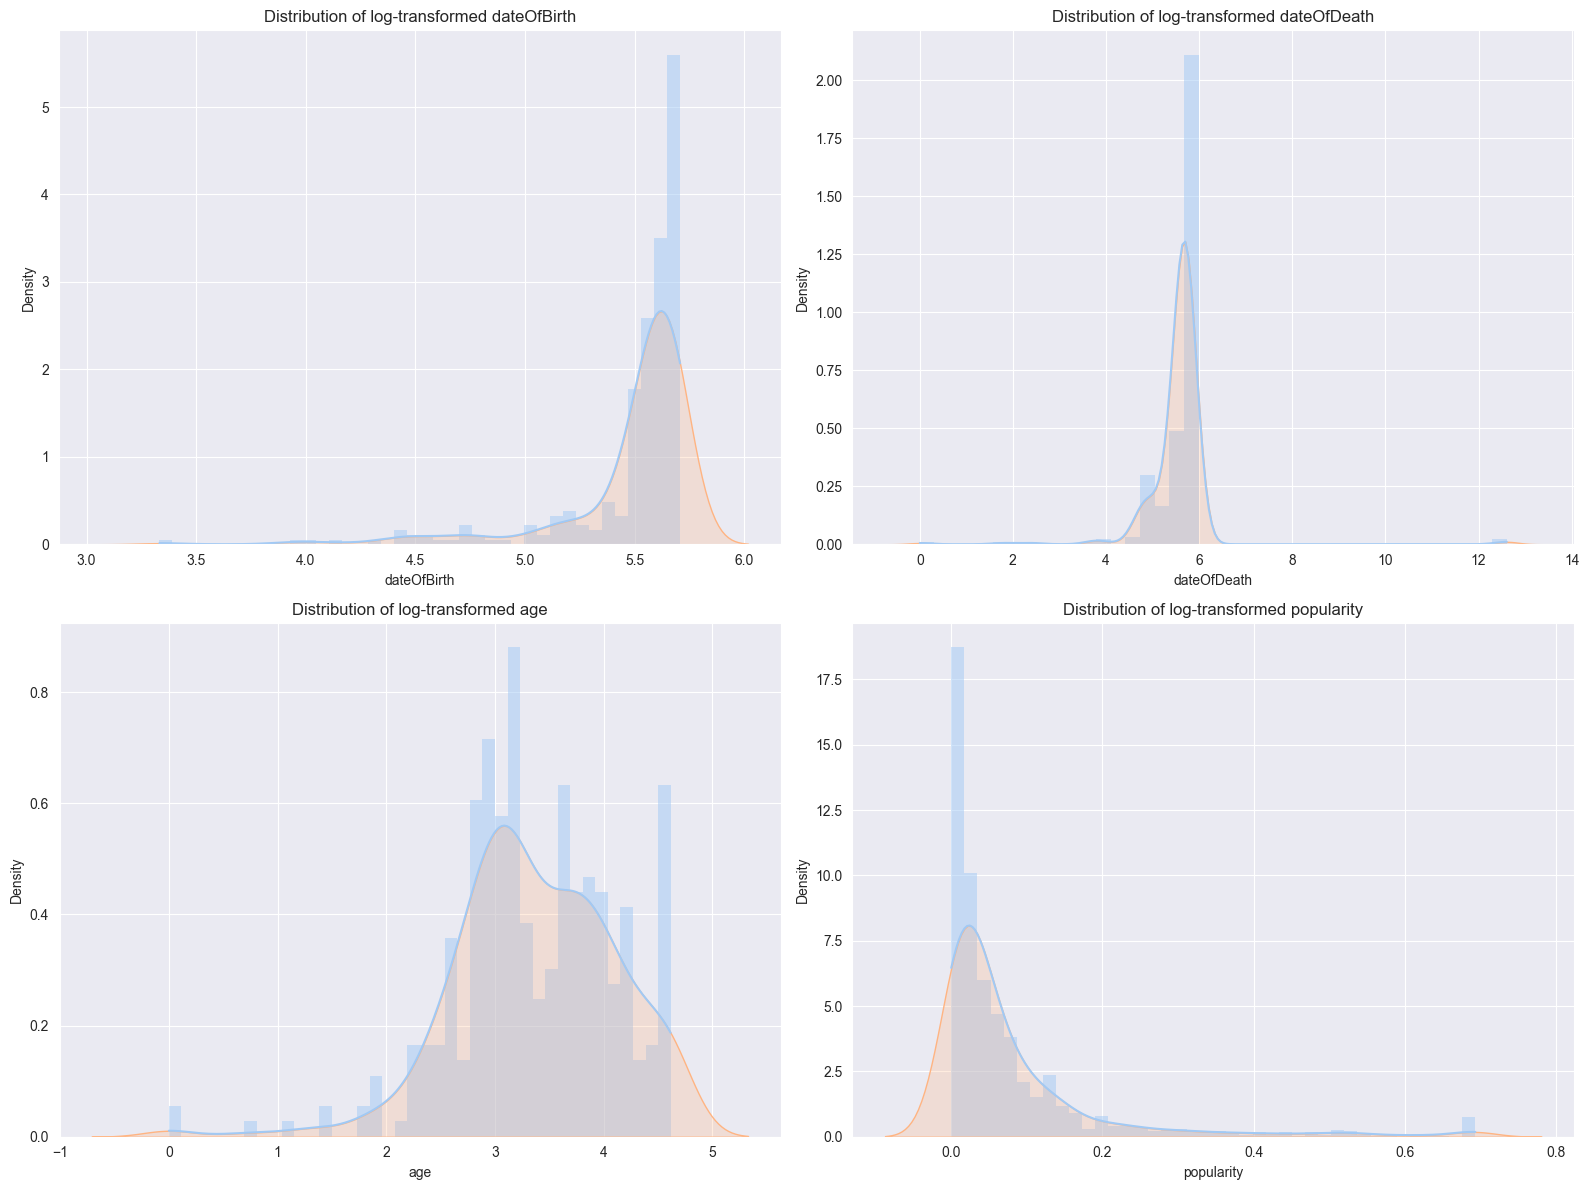

In [38]:
numerical_cols = numerical_df.select_dtypes(include=[np.number]).columns.tolist()

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

for i, col in enumerate(numerical_cols):
    log_values = np.log1p(numerical_df[col])
    sns.histplot(log_values, kde=True, stat='density', ax=axs[i], bins=40, linewidth=0)
    sns.kdeplot(log_values, fill=True, ax=axs[i])

    axs[i].set_title(f"Distribution of log-transformed {col}")

fig.tight_layout()
plt.show()

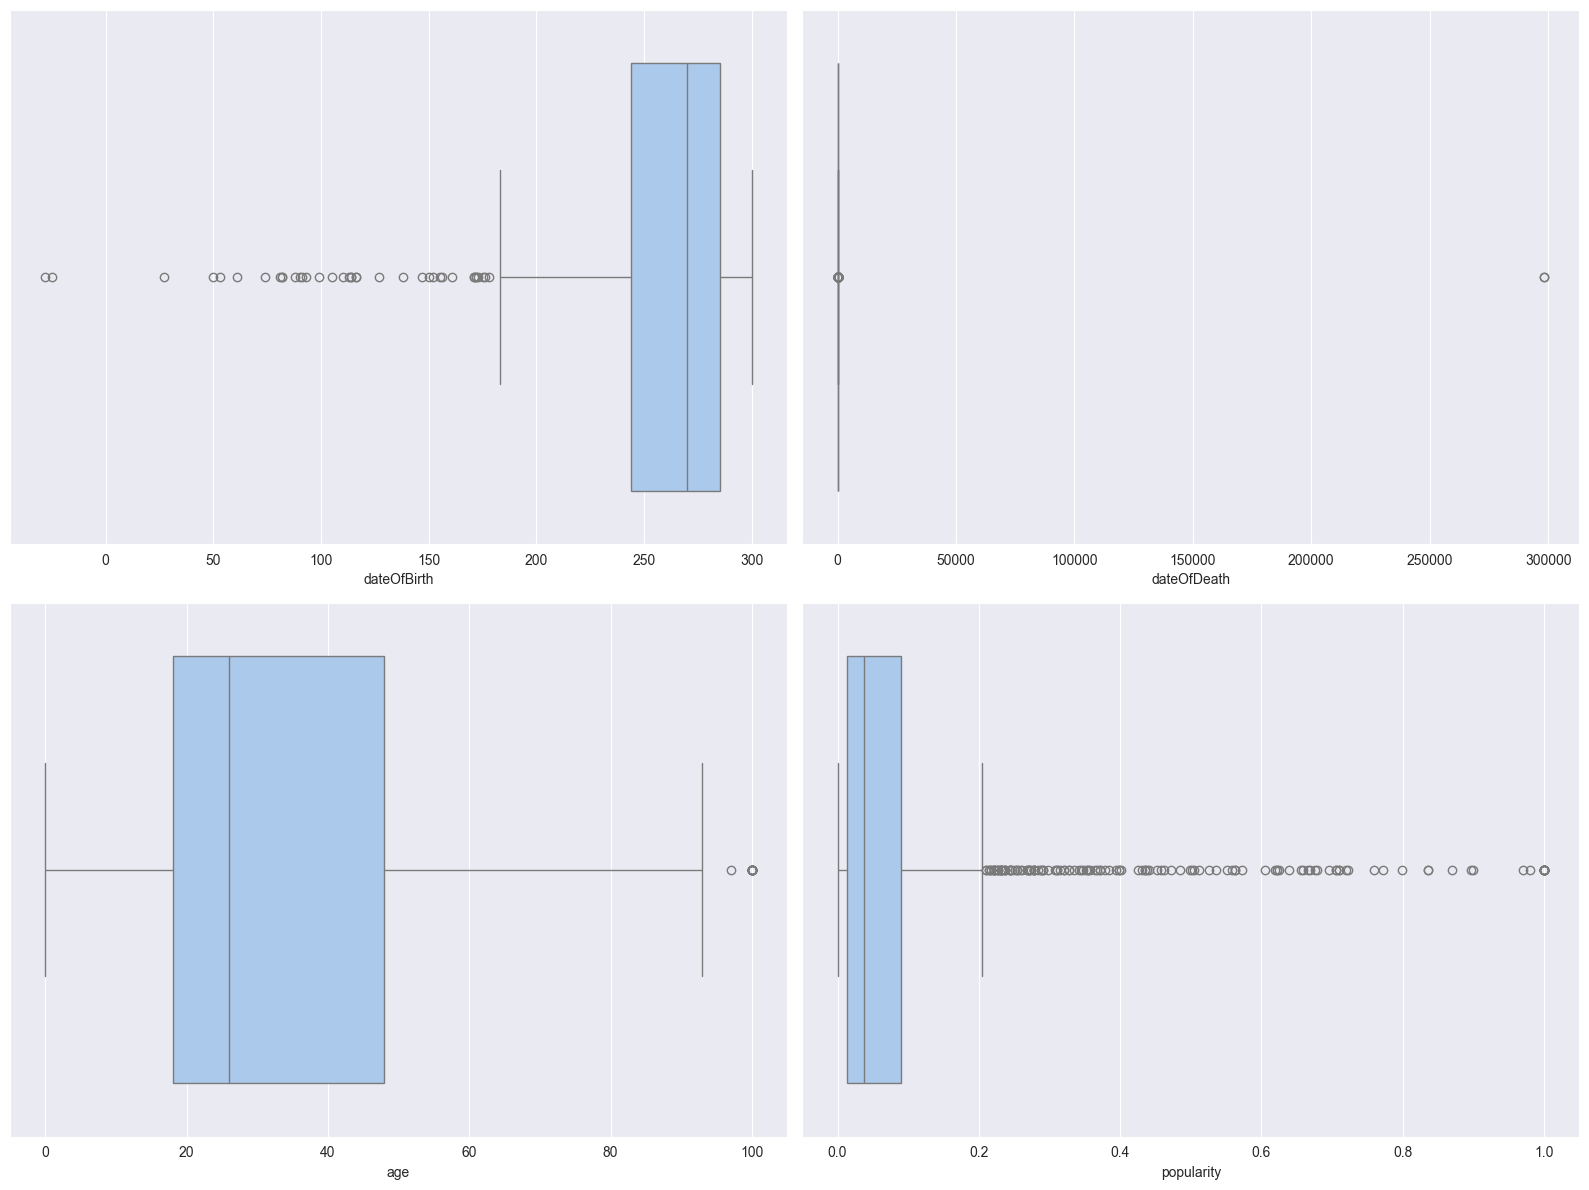

In [39]:
fig, axs = plt.subplots(2,2,figsize=(16,12))
axs = axs.flatten()
for i, col in enumerate(numerical_df.columns):
    sns.boxplot(data=numerical_df, x=numerical_df[col], ax=axs[i])
plt.tight_layout()

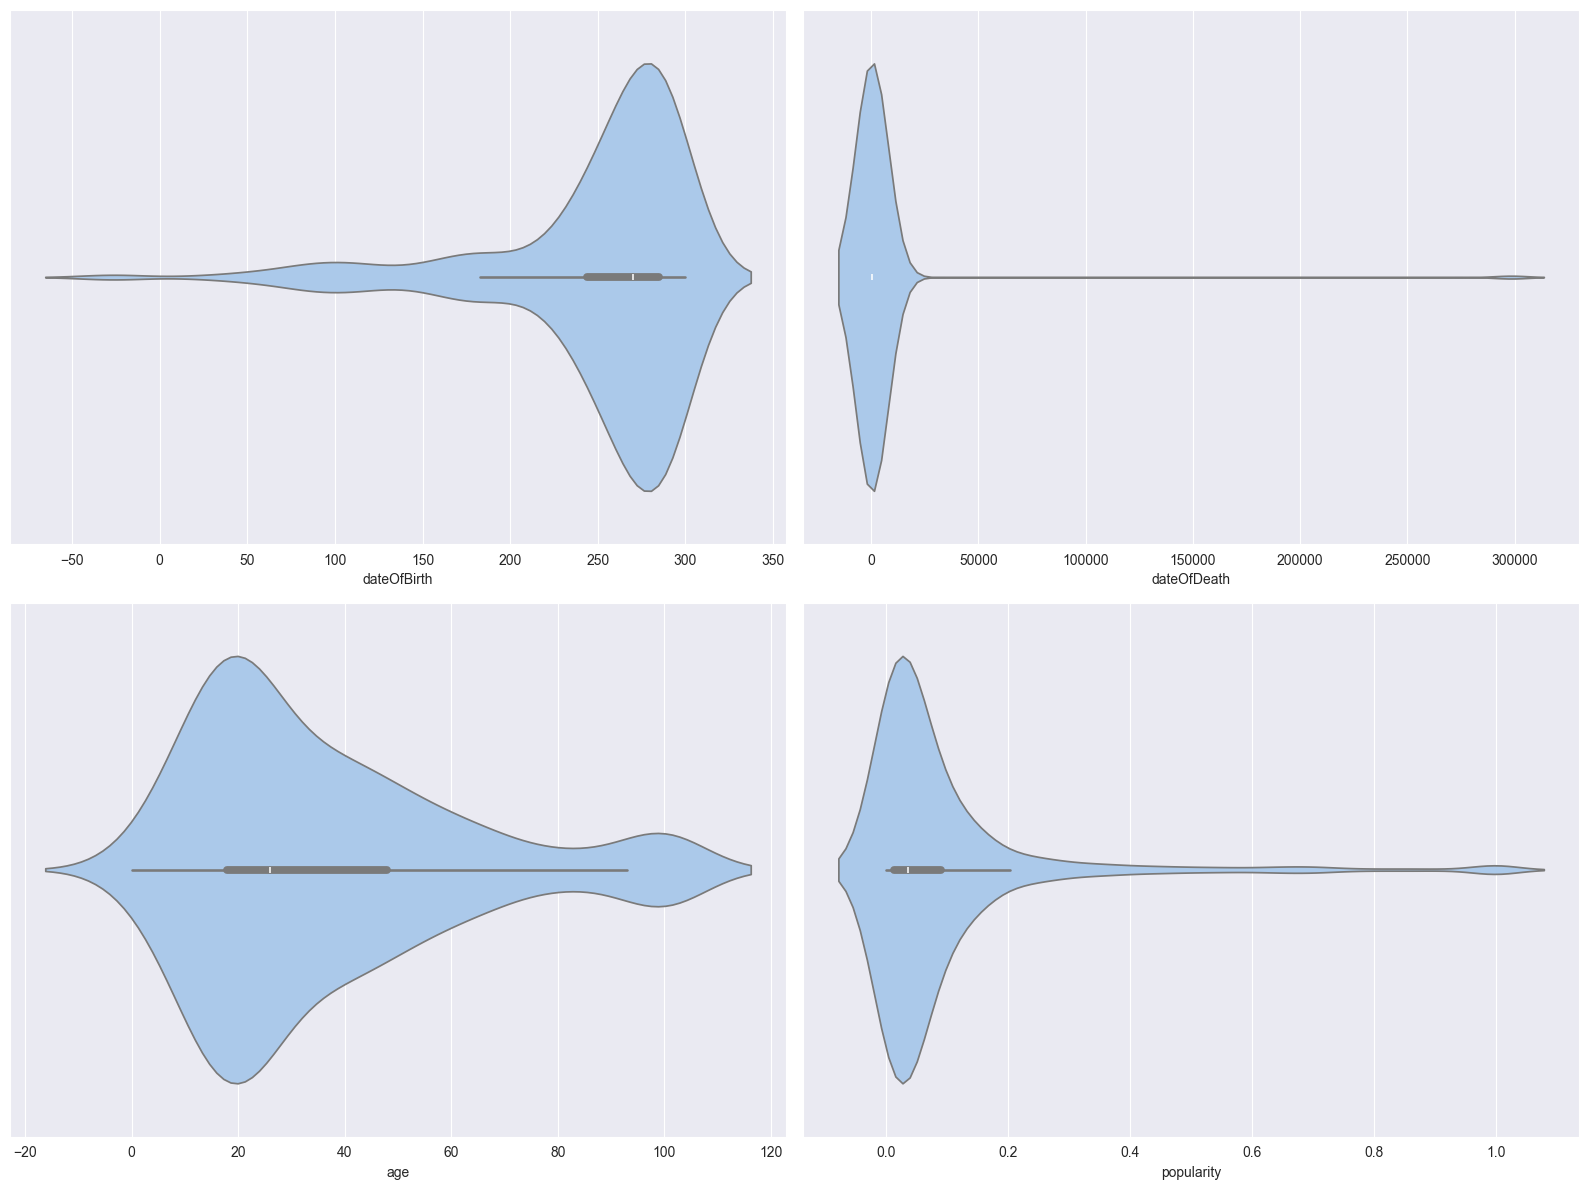

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()
for i, col in enumerate(numerical_df.columns):
    sns.violinplot(data=numerical_df, x=numerical_df[col], ax=axs[i])
plt.tight_layout()
plt.show()

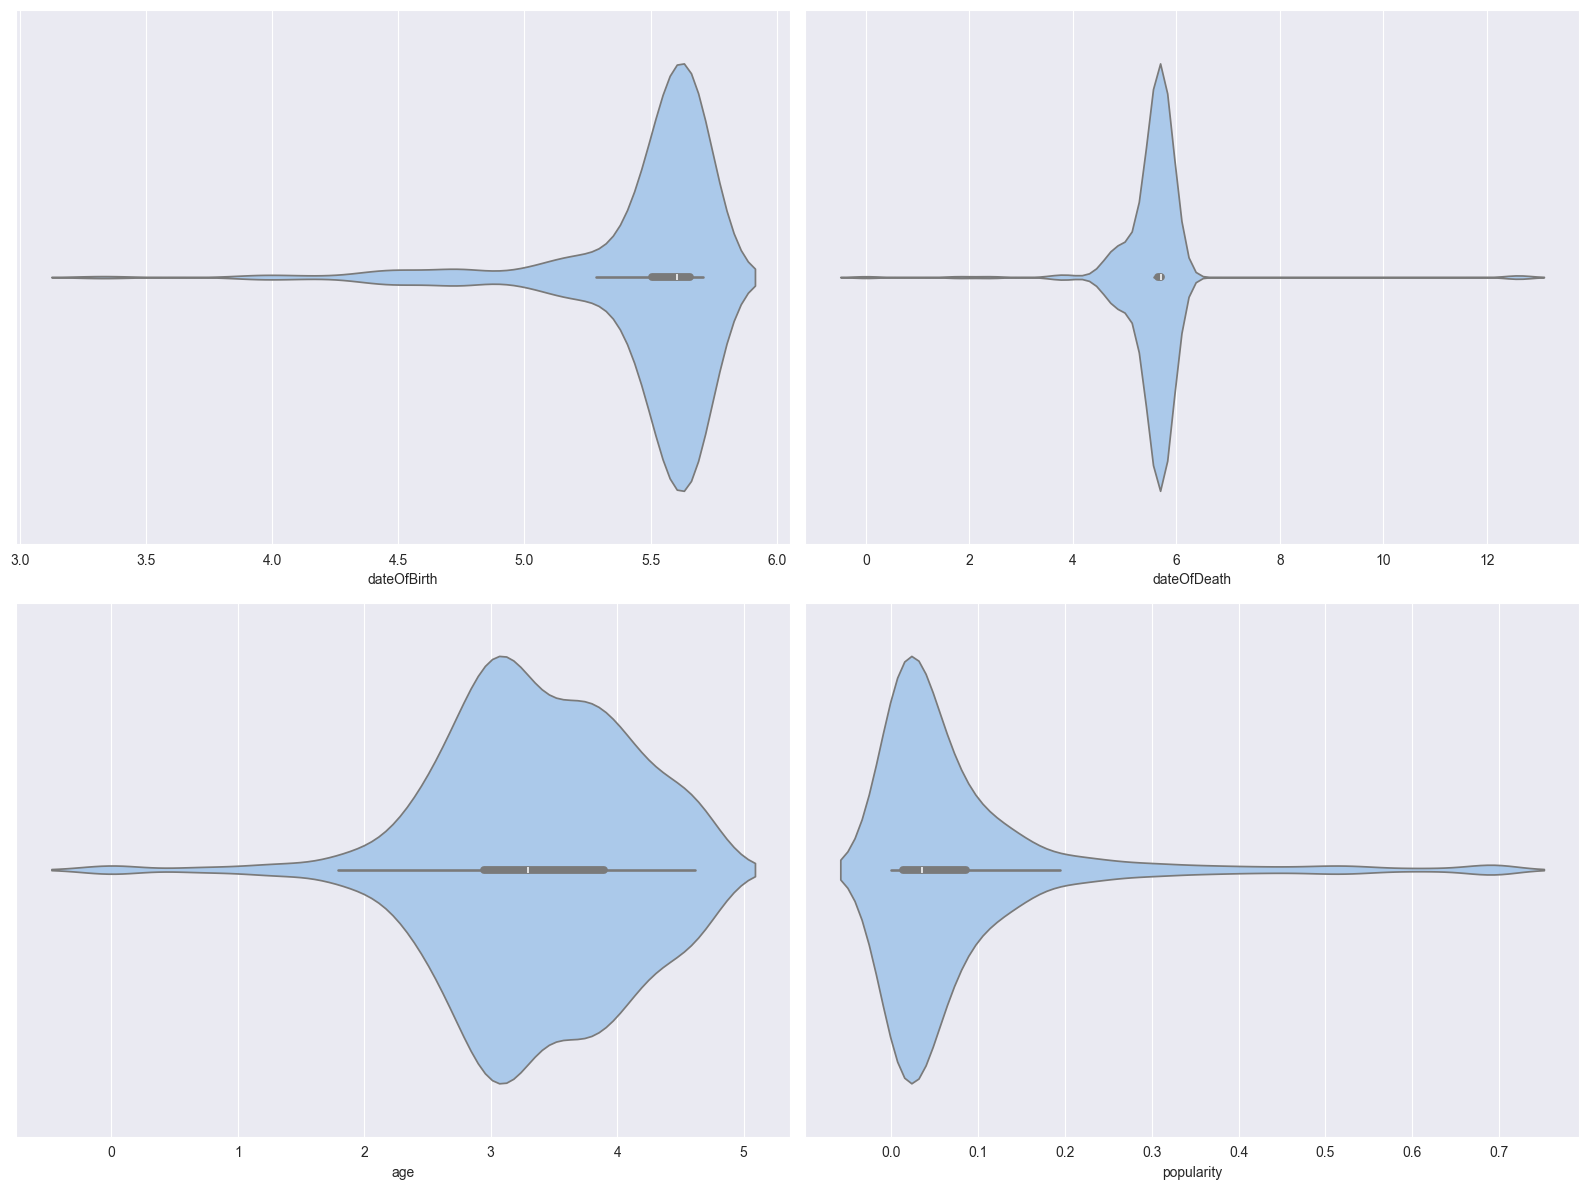

In [42]:
fig, axs = plt.subplots(2,2,figsize=(16,12))
axs = axs.flatten()
for i, col in enumerate(numerical_df.columns):
    sns.violinplot(data=numerical_df, x=np.log1p(numerical_df[col]), ax=axs[i])
plt.tight_layout()

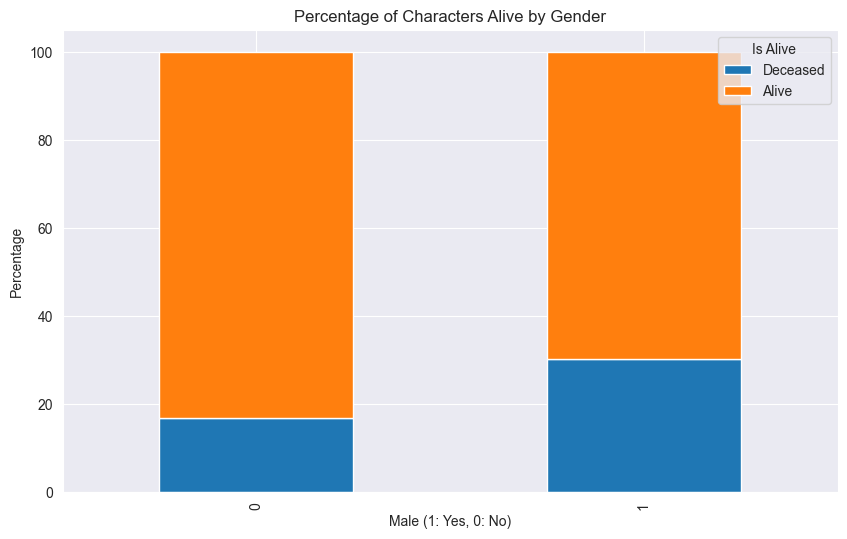

In [45]:
gender_alive_counts = df.groupby(['male', 'isAlive']).size().reset_index(name='count')
gender_totals = df.groupby(['male']).size().reset_index(name='total')
gender_alive_counts = gender_alive_counts.merge(gender_totals, on='male')
gender_alive_counts['percentage'] = (gender_alive_counts['count'] / gender_alive_counts['total']) * 100

gender_alive_pivot = gender_alive_counts.pivot(index='male', columns='isAlive', values='percentage').fillna(0)

ax = gender_alive_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Percentage of Characters Alive by Gender')
plt.xlabel('Male (1: Yes, 0: No)')
plt.ylabel('Percentage')
plt.legend(title='Is Alive', loc='upper right', labels=['Deceased', 'Alive'])
plt.show()

# 5. Conclusion